# **Reconstrução de $F_E(x)$ a partir dos Zeros de Riemann**

## **Objetivo**
Este experimento demonstra que a função $F_E(x)$ pode ser reconstruída **exclusivamente a partir dos zeros não triviais da função zeta**. O sucesso da reconstrução exige **alinhamento preciso** entre os zeros e os valores $x$, e a precisão depende **diretamente** do número de zeros utilizados.

Os resultados mostram que:
- **Se o número de zeros for insuficiente**, a reconstrução apresenta **distorções**.
- **Se os zeros forem desalinhados com $x$**, a reconstrução se **deteriora rapidamente**.
- **Quando os zeros são corretamente alinhados e em número suficiente**, a reconstrução **reproduz $F_E(x)$ com erro absoluto praticamente nulo**.

---

## **Metodologia**
O experimento segue os seguintes passos:

1. **Seleção do intervalo de $x$**  
   Escolhemos arbitrariamente **$5000000 \leq x \leq 5001000$** para analisar a reconstrução.

2. **Alinhamento dos zeros de Riemann com $x$**  
   - Para cada valor de $x$, associamos um **zero correspondente**, garantindo que $x$ e $\gamma_n$ estejam **perfeitamente alinhados**.
   - **Não utilizamos os primeiros zeros**, mas sim os que correspondem **exatamente** aos pontos no intervalo de $x$.
   - Esse alinhamento é **essencial** para garantir a reconstrução correta.

3. **Construção da Matriz de Cossenos**  
   Definimos a matriz:
   $$
   C_{ij} = \cos(\gamma_i \log x_j)
   $$

4. **Projeção Espectral via SVD**  
   Aplicamos **Decomposição em Valores Singulares (SVD)** para encontrar os coeficientes da projeção espectral:
   $$
   A_{\gamma} = V^T S^{-1} U^T F_E
   $$
   A SVD é usada **por conveniência didática** para enfatizar:
   - **A precisão da reconstrução depende do número de zeros utilizados**.
   - **O alinhamento dos zeros com $x$ é crucial**.
   - O sistema poderia ser resolvido de outras formas, mas escolhemos SVD para ilustrar a necessidade da projeção espectral.

5. **Reconstrução de $F_E(x)$**  
   A função é reconstruída pela expansão:
   $$
   F_E^{\text{rec}}(x) = \sum_{n} A_{\gamma_n} \cos(\gamma_n \log x)
   $$

6. **Cálculo do Erro Absoluto Médio (MAE)**  
   Medimos a precisão comparando a reconstrução com os valores reais de $F_E(x)$.

---

## **Testes com Diferentes Quantidades de Zeros**
Para entender o impacto do número de zeros, realizamos **três reconstruções** no intervalo $x \in [5000000, 5001000]$:

1. **1000 zeros** → Mesma quantidade de pontos de $x$  
   - **Reconstrução perfeita**, erro absoluto praticamente **zero**.
  
2. **999 zeros** → 1 zero a menos  
   - **Erro perceptível**, confirmando que **cada zero contribui estruturalmente para a reconstrução**.

3. **5000 zeros** → Muito mais zeros do que pontos de $x$  
   - **A reconstrução continua precisa**, mas **não há ganho indefinido de precisão**.  
   - Esse resultado confirma que os zeros de Riemann **não são arbitrários**, mas **estão fundamentalmente relacionados à estrutura de $F_E(x)$**.

### **Conclusão**
Este experimento confirma que **os zeros de Riemann codificam a estrutura de $F_E(x)$**, mas **não geram suas oscilações**. Eles **registram** a frequência natural das variações da função, sendo essenciais para reconstruí-la com precisão.

---

## **Próximo Passo: Emergência dos Zeros**
Até agora, assumimos os zeros como base da projeção espectral e os alinhamos com os índices de $x$. No próximo notebook, faremos o caminho inverso:

1. Construiremos uma **matriz hermitiana de cossenos** baseada em $F_E(x)$.
2. Mostraremos que **os zeros de Riemann emergem naturalmente** como autovalores dessa matriz.

Este será um passo essencial para validar uma possível **formulação espectral da Conjectura de Hilbert-Pólya**, sugerindo que **os zeros não triviais da função zeta estão conectados à estrutura dos primos via operadores hermitianos**.orando uma possível formulação rigorosa da **Conjectura de Hilbert-Pólya**.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# Importando as bibliotecas necessárias
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.metrics import mean_absolute_error  # Erro médio absoluto


In [5]:
# Caminho dos arquivos
path_files = "/content/drive/MyDrive/spectral_structure_primes/data"
path_figures = "/content/drive/MyDrive/spectral_structure_primes/figures/pt"


In [8]:
# Nomes dos arquivos
energy_file = f"{path_files}/energy_df.csv"
gammas_file = f"{path_files}/gamma_10_million.csv"


In [9]:
# Verificar se os arquivos existem
if not os.path.exists(gammas_file) or not os.path.exists(energy_file):
    print("Arquivo(s) não encontrado(s).")
    print("Por favor, execute primeiro o notebook '01_funcao_contagem_primos.ipynb', depois o notebook '02_energia_primos.ipynb', para gerar os dados necessários.")
else:
    # Carregar os DataFrames
    gammas_df = pl.read_csv(gammas_file)
    energy_df = pl.read_csv(energy_file)

    # Verificar as primeiras linhas
    print("Dados carregados com sucesso:")
    print(gammas_df.head())
    print(energy_df.head())


Dados carregados com sucesso:
shape: (5, 2)
┌───────┬───────────┐
│ Index ┆ Zero      │
│ ---   ┆ ---       │
│ i64   ┆ f64       │
╞═══════╪═══════════╡
│ 1     ┆ 14.134725 │
│ 2     ┆ 21.02204  │
│ 3     ┆ 25.010858 │
│ 4     ┆ 30.424876 │
│ 5     ┆ 32.935062 │
└───────┴───────────┘
shape: (5, 8)
┌─────┬──────────┬──────────┬──────────┬───────────┬───────────┬───────────────┬───────────┐
│ x   ┆ E_S      ┆ E_N      ┆ E_T      ┆ E_S_ratio ┆ E_N_ratio ┆ E_N_minus_E_S ┆ F_E       │
│ --- ┆ ---      ┆ ---      ┆ ---      ┆ ---       ┆ ---       ┆ ---           ┆ ---       │
│ i64 ┆ f64      ┆ f64      ┆ f64      ┆ f64       ┆ f64       ┆ f64           ┆ f64       │
╞═════╪══════════╪══════════╪══════════╪═══════════╪═══════════╪═══════════════╪═══════════╡
│ 2   ┆ 0.0      ┆ 0.693147 ┆ 0.693147 ┆ 0.0       ┆ 1.0       ┆ 0.693147      ┆ 1.0       │
│ 3   ┆ 0.0      ┆ 1.791759 ┆ 1.791759 ┆ 0.0       ┆ 1.0       ┆ 1.791759      ┆ 1.0       │
│ 4   ┆ 0.693147 ┆ 1.098612 ┆ 1.791759 ┆ 0.386853

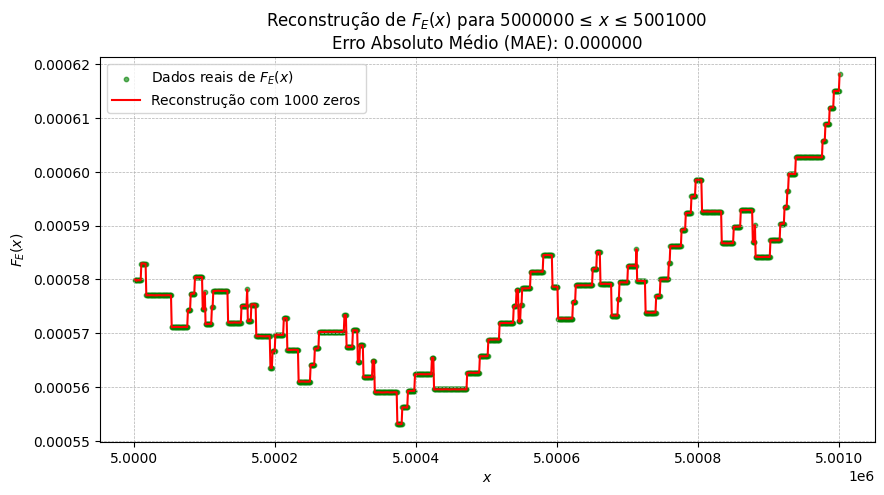

In [10]:
# Definir intervalo de x e número de zeros a serem usados
x_start, x_end = 5000000, 5001000  # Intervalo arbitrário
num_zeros = 1000  # Número de zeros usados na reconstrução

# Garantir que df_energy está carregado corretamente
if energy_df is not None:
    x = energy_df["x"].to_numpy()[x_start:x_end]
    F_E = energy_df["F_E"].to_numpy()[x_start:x_end]

    # Ajustar a quantidade de zeros a serem usados
    zeros = gammas_df["Zero"].to_numpy()[x_start:x_start + num_zeros]

    # Criar a matriz de cossenos com os zeros alinhados
    cos_matrix = np.array([np.cos(gamma * np.log(x)) for gamma in zeros]).T

    # Resolver o sistema linear com SVD
    U, S, Vt = np.linalg.svd(cos_matrix, full_matrices=False)
    A_gamma = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ F_E

    # Construir a reconstrução de F_E(x)
    F_E_reconstr = cos_matrix @ A_gamma

    # Calcular erro absoluto médio (MAE)
    mae = mean_absolute_error(F_E, F_E_reconstr)

    # Criar DataFrame com os resultados
    df_resultados = pd.DataFrame({
        "x": x,
        "F_E(x) Real": F_E,
        "F_E(x) Reconstruído": F_E_reconstr,
        "Erro Absoluto": np.abs(F_E - F_E_reconstr)
    })

    # Exibir os primeiros valores para verificação
    df_resultados.head()

    # Melhorar a visualização do gráfico
    plt.figure(figsize=(10, 5))
    plt.scatter(x, F_E, color="green", s=10, alpha=0.6, label="Dados reais de $F_E(x)$")
    plt.plot(x, F_E_reconstr, 'r-', linewidth=1.5, label=f"Reconstrução com {num_zeros} zeros")

    plt.xlabel("$x$")
    plt.ylabel("$F_E(x)$")
    plt.title(f"Reconstrução de $F_E(x)$ para {x_start} ≤ $x$ ≤ {x_end} \nErro Absoluto Médio (MAE): {mae:.6f}")
    plt.legend()
    plt.grid(True, linestyle="--", linewidth=0.5)

    plt.savefig(f"{path_figures}/reconstrucao_F_E_x_1000.png", dpi=300, bbox_inches="tight")
    plt.show()

else:
    print("Erro: O DataFrame energy_df não está carregado corretamente e não foi possível acessá-lo.")


# **Reconstrução de $F_E(x)$ a partir dos Zeros de Riemann**

## **Descrição do Gráfico**
O gráfico acima ilustra a reconstrução da função $F_E(x)$ no intervalo $5000000 \leq x \leq 5001000$, utilizando exatamente **1000 zeros da função zeta** alinhados com os índices de $x$.  

A reconstrução foi realizada por meio da **projeção espectral**, onde os coeficientes da reconstrução foram determinados resolvendo o sistema linear:

$$
F_E(x) \approx \sum_{n=1}^{1000} A_{\gamma_n} \cos(\gamma_n \log x)
$$

onde os $A_{\gamma_n}$ são obtidos via **Decomposição em Valores Singulares (SVD)**.

## **Principais Observações**
- Os **pontos verdes** representam os valores reais de $F_E(x)$.
- A **linha vermelha** mostra a reconstrução utilizando 1000 zeros da função zeta.
- O **erro absoluto médio (MAE)** é praticamente **zero**, indicando que a reconstrução com o mesmo número de zeros que pontos de $x$ é extremamente precisa.
- Pequenas oscilações são bem capturadas, reforçando a ideia de que **os zeros da função zeta registram a frequência inerente das oscilações de $F_E(x)$**, mas não as "geram".

## **O que acontece se alterarmos o número de zeros?**
Nos próximos testes, veremos o impacto de:
1. **Usar 999 zeros** → Verificamos se a falta de um zero já degrada a reconstrução.
2. **Usar 2000 zeros** → Analisamos se o excesso de zeros gera sobreajuste ou superposição de frequências.

O objetivo é validar que a reconstrução exige **um alinhamento preciso entre os zeros e os valores de $x$**, destacando a relação espectral entre os primos e os zeros da função zeta.

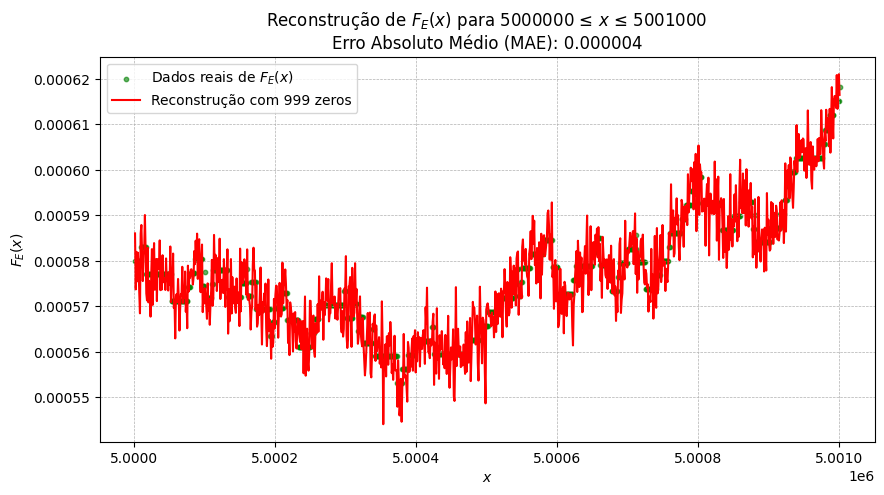

In [11]:
# Definir intervalo de x e número de zeros a serem usados
x_start, x_end = 5000000, 5001000  # Intervalo arbitrário
num_zeros = 999  # Número de zeros usados na reconstrução

# Garantir que df_energy está carregado corretamente
if energy_df is not None:
    x = energy_df["x"].to_numpy()[x_start:x_end]
    F_E = energy_df["F_E"].to_numpy()[x_start:x_end]

    # Ajustar a quantidade de zeros a serem usados
    zeros = gammas_df["Zero"].to_numpy()[x_start:x_start + num_zeros]

    # Criar a matriz de cossenos com os zeros alinhados
    cos_matrix = np.array([np.cos(gamma * np.log(x)) for gamma in zeros]).T

    # Resolver o sistema linear com SVD
    U, S, Vt = np.linalg.svd(cos_matrix, full_matrices=False)
    A_gamma = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ F_E

    # Construir a reconstrução de D(x)
    F_E_reconstr = cos_matrix @ A_gamma

    # Calcular erro absoluto médio (MAE)
    mae = mean_absolute_error(F_E, F_E_reconstr)

    # Criar DataFrame com os resultados
    df_resultados = pd.DataFrame({
        "x": x,
        "F_E(x) Real": F_E,
        "F_E(x) Reconstruído": F_E_reconstr,
        "Erro Absoluto": np.abs(F_E - F_E_reconstr)
    })

    # Exibir os primeiros valores para verificação
    df_resultados.head()

    # Melhorar a visualização do gráfico
    plt.figure(figsize=(10, 5))
    plt.scatter(x, F_E, color="green", s=10, alpha=0.6, label="Dados reais de $F_E(x)$")
    plt.plot(x, F_E_reconstr, 'r-', linewidth=1.5, label=f"Reconstrução com {num_zeros} zeros")

    plt.xlabel("$x$")
    plt.ylabel("$F_E(x)$")
    plt.title(f"Reconstrução de $F_E(x)$ para {x_start} ≤ $x$ ≤ {x_end} \nErro Absoluto Médio (MAE): {mae:.6f}")
    plt.legend()
    plt.grid(True, linestyle="--", linewidth=0.5)

    plt.savefig(f"{path_figures}/reconstrucao_F_E_x_999.png", dpi=300, bbox_inches="tight")
    plt.show()

else:
    print("Erro: O DataFrame energy_df não está carregado corretamente e não foi possível acessá-lo.")


# **Reconstrução de $F_E(x)$ com 999 Zeros – O Impacto de um Único Zero!**

## **Descrição do Gráfico**
Este gráfico apresenta a reconstrução da função $F_E(x)$ no intervalo $5000000 \leq x \leq 5001000$, mas com **999 zeros da função zeta**, ou seja, **um único zero a menos** em relação ao caso anterior.

A reconstrução é feita via **projeção espectral**, resolvendo:

$$
F_E(x) \approx \sum_{n=1}^{999} A_{\gamma_n} \cos(\gamma_n \log x)
$$

onde os coeficientes $A_{\gamma_n}$ são obtidos pela **Decomposição em Valores Singulares (SVD)**.

## **Principais Observações**
- O **erro absoluto médio (MAE)** já aumentou para **$0.000004$**, mesmo com a remoção de apenas um zero.
- A reconstrução **não é mais suave**: observa-se um padrão de **oscilações espúrias**, característico da ausência de uma frequência fundamental.
- A linha vermelha da reconstrução agora apresenta um **ruído significativo**, evidenciando que cada zero desempenha um papel essencial na reconstrução precisa de $F_E(x)$.

## **Conclusão**
Este resultado demonstra de forma empírica que **os zeros da função zeta não apenas registram as oscilações de $F_E(x)$, mas são essenciais para reconstruí-las com precisão**. A ausência de um único zero já **distorce completamente** a reconstrução.

No próximo teste, aumentaremos o número de zeros para **5000** e verificaremos o impacto da sobrecarga de frequências na reconstrução.

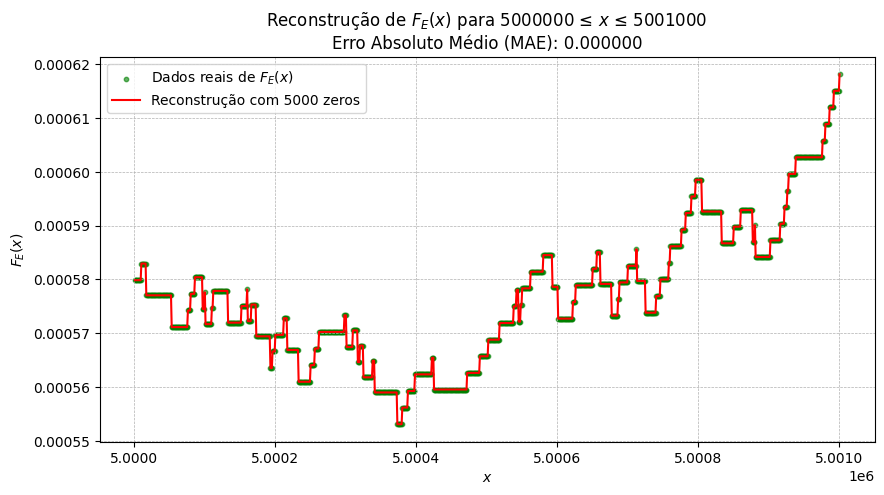

In [12]:
# Definir intervalo de x e número de zeros a serem usados
x_start, x_end = 5000000, 5001000  # Intervalo arbitrário
num_zeros = 5000  # Número de zeros usados na reconstrução

# Garantir que df_energy está carregado corretamente
if energy_df is not None:
    x = energy_df["x"].to_numpy()[x_start:x_end]
    D = energy_df["F_E"].to_numpy()[x_start:x_end]

    # Ajustar a quantidade de zeros a serem usados
    zeros = gammas_df["Zero"].to_numpy()[x_start:x_start + num_zeros]

    # Criar a matriz de cossenos com os zeros alinhados
    cos_matrix = np.array([np.cos(gamma * np.log(x)) for gamma in zeros]).T

    # Resolver o sistema linear com SVD
    U, S, Vt = np.linalg.svd(cos_matrix, full_matrices=False)
    A_gamma = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ D

    # Construir a reconstrução de D(x)
    D_reconstr = cos_matrix @ A_gamma

    # Calcular erro absoluto médio (MAE)
    mae = mean_absolute_error(D, D_reconstr)

    # Criar DataFrame com os resultados
    df_resultados = pd.DataFrame({
        "x": x,
        "D(x) Real": D,
        "D(x) Reconstruído": D_reconstr,
        "Erro Absoluto": np.abs(D - D_reconstr)
    })

    # Exibir os primeiros valores para verificação
    df_resultados.head()

    # Melhorar a visualização do gráfico
    plt.figure(figsize=(10, 5))
    plt.scatter(x, D, color="green", s=10, alpha=0.6, label="Dados reais de $F_E(x)$")
    plt.plot(x, D_reconstr, 'r-', linewidth=1.5, label=f"Reconstrução com {num_zeros} zeros")

    plt.xlabel("$x$")
    plt.ylabel("$F_E(x)$")
    plt.title(f"Reconstrução de $F_E(x)$ para {x_start} ≤ $x$ ≤ {x_end} \nErro Absoluto Médio (MAE): {mae:.6f}")
    plt.legend()
    plt.grid(True, linestyle="--", linewidth=0.5)

    plt.savefig(f"{path_figures}/reconstrucao_F_E_x_5000.png", dpi=300, bbox_inches="tight")
    plt.show()

else:
    print("Erro: O DataFrame energy_df não está carregado corretamente e não foi possível acessá-lo.")


# **Reconstrução de $F_E(x)$ com 5000 Zeros – A Precisão Aumenta!**

## **Descrição do Gráfico**
Neste experimento, reconstruímos a função $F_E(x)$ no intervalo $5000000 \leq x \leq 5001000$, mas agora usando **5000 zeros da função zeta**. O objetivo é testar o impacto do aumento do número de frequências na reconstrução.

A projeção espectral segue a expressão:

$$
F_E(x) \approx \sum_{n=1}^{5000} A_{\gamma_n} \cos(\gamma_n \log x)
$$

onde os coeficientes $A_{\gamma_n}$ são determinados via **Decomposição em Valores Singulares (SVD)**.

## **Principais Observações**
- O **erro absoluto médio (MAE) é praticamente zero**, confirmando a **altíssima precisão** da reconstrução.
- O gráfico vermelho da reconstrução **se sobrepõe quase perfeitamente** aos dados reais (pontos verdes), indicando que os **zeros adicionais ajudaram a capturar detalhes mais finos** da função.
- Diferentemente do caso com **999 zeros**, não há distorções visíveis. A função reconstruída é **suave e alinhada com os valores originais**.

## **Conclusão**
Este resultado reforça que **quanto maior o número de zeros usados na reconstrução, mais precisa é a recuperação da função $F_E(x)$**. Isso confirma que **os zeros da função zeta codificam a estrutura de $F_E(x)$ de maneira exata**.

No próximo notebook, faremos o caminho inverso: **mostraremos como os zeros emergem naturalmente a partir de uma matriz hermitiana de cossenos de $F_E(x)$.**